In [1]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# Constants
game_sit_feat = ['month', 'year', 'inning', 'inning_topbot', 
                 'outs', 'strikes', 'balls', 'pitch_number', 
                 'on_1b', 'on_2b', 'on_3b', 'score_diff', 
                 'of_std', 'of_strat', 'if_std', 'if_strat', 'if_shift']
wo_recursive_feat = game_sit_feat + ['Pitcher_Tend_FF', 'Pitcher_Tend_CU', 'Pitcher_Tend_CH', 'Pitcher_Tend_SL', 'Pitcher_Tend_SI', 
                                     'Pitcher_Strike_Tend_FF', 'Pitcher_Strike_Tend_CU', 'Pitcher_Strike_Tend_CH', 'Pitcher_Strike_Tend_SL', 'Pitcher_Strike_Tend_SI', 
                                     'batter_stance', 'Strike_Tend_FF', 'Strike_Tend_CU', 'Strike_Tend_CH', 'Strike_Tend_SL', 'Strike_Tend_SI', 'Overall_Strike_Tend', 
                                     'Slug_Avg_FF', 'Slug_Avg_CU', 'Slug_Avg_CH', 'Slug_Avg_SL', 'Slug_Avg_SI', 'Overall_Slug_Avg', 
                                     'Zone_1_Strike_Pcnt', 'Zone_2_Strike_Pcnt', 'Zone_3_Strike_Pcnt', 'Zone_4_Strike_Pcnt', 'Zone_5_Strike_Pcnt', 'Zone_6_Strike_Pcnt', 'Zone_7_Strike_Pcnt', 'Zone_8_Strike_Pcnt', 'Zone_9_Strike_Pcnt', 'Zone_11_Strike_Pcnt', 'Zone_12_Strike_Pcnt', 'Zone_13_Strike_Pcnt', 'Zone_14_Strike_Pcnt']

In [3]:
# Import the data
X_whole = pd.read_csv("../data/VerlanderOnly_X_train.csv").to_numpy()
y = pd.read_csv("../data/VerlanderOnly_y_train.csv").to_numpy().T[0]

verlander_cols = np.array(pd.read_csv("../data/VerlanderOnlyDataset.csv", index_col=0).columns)
game_sit_cols = np.where(np.isin(verlander_cols, game_sit_feat))[0] - 1
wo_recursive_cols = np.where(np.isin(verlander_cols, wo_recursive_feat))[0] - 1

X_game_sit = X_whole[:, game_sit_cols]
X_wo_recurse = X_whole[:, wo_recursive_cols]

## Non-Regularized

In [4]:
# Linear SVM - Without Recursive Features: Non-regularized (53 features)
svm_wo_recurse_models = []
svm_wo_recurse_train_accs = []
svm_wo_recurse_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_wo_recurse, y):
    X_train, X_test = X_wo_recurse[train_index], X_wo_recurse[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(X_train, y_train)
    
    test_acc = model.score(X_test, y_test)
    train_acc = model.score(X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(X_test)))
    print(np.unique(model.predict(X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_wo_recurse_train_accs.append(train_acc)
    svm_wo_recurse_test_accs.append(test_acc)
    svm_wo_recurse_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5123794283682269
Test Accuracy:  0.5088
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 215  927 3295   46 1142] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.522025158910077
Test Accuracy:  0.5162666666666667
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 266  928 3496   85  850] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5181793937238865
Test Accuracy:  0.5023115220483642
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 367  827 3352   91  987] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5237354431505022
Test Accuracy:  0.5229374110953058
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 227  923 3599   93  782] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5092008178504756
Test Accuracy:  0.5096017069701281
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 324  864 3277   91 1068] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
# Linear SVM - Game Situational Features: Non-regularized (17 features)
svm_game_sit_models = []
svm_game_sit_train_accs = []
svm_game_sit_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_game_sit, y):
    X_train, X_test = X_game_sit[train_index], X_game_sit[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(X_train, y_train)
    
    test_acc = model.score(X_test, y_test)
    train_acc = model.score(X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(X_test)))
    print(np.unique(model.predict(X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_game_sit_train_accs.append(train_acc)
    svm_game_sit_test_accs.append(test_acc)
    svm_game_sit_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5440280926345735
Test Accuracy:  0.5415111111111112
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   4 1310 4011   81  219] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5435391385518069
Test Accuracy:  0.5416888888888889
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   8 1344 3993   35  245] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5382700684505289
Test Accuracy:  0.5229374110953058
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   2 1140 3863   15  604] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5313361187661125
Test Accuracy:  0.5398293029871978
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   3 1467 3871   64  219] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5438261178771446
Test Accuracy:  0.5526315789473685
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   1 1296 4104   27  196] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
# Linear SVM - All Features: Non-regularized (100 features)
svm_whole_models = []
svm_whole_train_accs = []
svm_whole_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_whole, y):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(X_train, y_train)
    
    test_acc = model.score(X_test, y_test)
    train_acc = model.score(X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(X_test)))
    print(np.unique(model.predict(X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_whole_train_accs.append(train_acc)
    svm_whole_test_accs.append(test_acc)
    svm_whole_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5358936747121839
Test Accuracy:  0.5212444444444444
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 456  924 3264   70  911] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.48482019824865535
Test Accuracy:  0.4826666666666667
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 406  637 2702   55 1825] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5408925237798915
Test Accuracy:  0.530049786628734
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 525  892 3285   62  860] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5303138056716152
Test Accuracy:  0.52649359886202
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 548  721 3218   60 1077] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5432927371321895
Test Accuracy:  0.5565433854907539
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 447  901 3527   57  692] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Regularized

In [7]:
# Linear SVM - Without Recursive Features: Regularized (53 features)
svm_wo_recurse_reg_models = []
svm_wo_recurse_reg_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_wo_recurse, y):
    X_train, X_test = X_wo_recurse[train_index], X_wo_recurse[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(scaled_X_train, y_train)
    
    test_acc = model.score(scaled_X_test, y_test)
    train_acc = model.score(scaled_X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(scaled_X_test)))
    print(np.unique(model.predict(scaled_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_wo_recurse_reg_test_accs.append(test_acc)
    svm_wo_recurse_reg_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4797528559363471
Test Accuracy:  0.4776888888888889
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 225  834 3094  510  962] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5047784148997644
Test Accuracy:  0.5008
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 318  884 3302  195  926] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5060894301715708
Test Accuracy:  0.4866642958748222
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 322  885 3178  183 1056] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.505378255844964
Test Accuracy:  0.504800853485064
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 280  851 3322  195  976] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5034669748422081
Test Accuracy:  0.5058677098150782
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 373  803 3269  189  990] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
# LinearSVC - Game Situational Features: Regularized (17 features)
svm_game_sit_reg_models = []
svm_game_sit_reg_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_game_sit, y):
    X_train, X_test = X_game_sit[train_index], X_game_sit[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(scaled_X_train, y_train)
    
    test_acc = model.score(scaled_X_test, y_test)
    train_acc = model.score(scaled_X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(scaled_X_test)))
    print(np.unique(model.predict(scaled_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_game_sit_reg_test_accs.append(test_acc)
    svm_game_sit_reg_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4845534960216918
Test Accuracy:  0.48355555555555557
Predictions:
['CU' 'FF' 'SI' 'SL']
[1109 3458  602  456] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.48241987820598303
Test Accuracy:  0.4791111111111111
Predictions:
['CU' 'FF' 'SI' 'SL']
[1104 3439  612  470] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4938216730376033
Test Accuracy:  0.4797297297297297
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   1 1129 3466  514  514] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4842208196284114
Test Accuracy:  0.48986486486486486
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   4 1052 3502  563  503] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.4840430260467597
Test Accuracy:  0.49324324324324326
Predictions:
['CU' 'FF' 'SI' 'SL']
[ 987 3529  577  531] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
# Linear SVC - All Features: Regularized (100 features)
svm_whole_reg_models = []
svm_whole_reg_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_whole, y):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(scaled_X_train, y_train)
    
    test_acc = model.score(scaled_X_test, y_test)
    train_acc = model.score(scaled_X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(scaled_X_test)))
    print(np.unique(model.predict(scaled_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_whole_reg_test_accs.append(test_acc)
    svm_whole_reg_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5326043472462995
Test Accuracy:  0.5168
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 502  893 3185  102  943] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5322931946481753
Test Accuracy:  0.5242666666666667
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 548  878 3214   77  908] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5308916348119833
Test Accuracy:  0.5151137980085349
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 524  878 3108  105 1009] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.529869321717486
Test Accuracy:  0.5261379800853485
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 535  797 3206  110  976] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5276469019468397
Test Accuracy:  0.5344950213371266
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 526  806 3251   95  946] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## PCA

In [10]:
# Linear SVM - Without Recursive Features: PCA 95% (53 features)
svm_wo_recurse_pca_models = []
svm_wo_recurse_pca_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_wo_recurse, y):
    X_train, X_test = X_wo_recurse[train_index], X_wo_recurse[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(reduced_X_train, y_train)
    
    test_acc = model.score(reduced_X_test, y_test)
    print("Train Accuracy: ", model.score(reduced_X_train, y_train))
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(reduced_X_test)))
    print(np.unique(model.predict(reduced_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_wo_recurse_pca_test_accs.append(test_acc)
    svm_wo_recurse_pca_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4954438369560386
Test Accuracy:  0.49706666666666666
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 186  931 3317  264  927] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4945548295328266
Test Accuracy:  0.5036444444444445
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 195  921 3331  308  870] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4979553738110054
Test Accuracy:  0.48239687055476527
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 207  920 3203  285 1009] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4933771890834741
Test Accuracy:  0.48826458036984355
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 197  844 3334  330  919] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.4951106765045782
Test Accuracy:  0.5
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 246  826 3317  296  939] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
# Linear SVM - Game Situational Features: PCA 95% (53 features)
svm_game_sit_pca_models = []
svm_game_sit_pca_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_game_sit, y):
    X_train, X_test = X_game_sit[train_index], X_game_sit[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(reduced_X_train, y_train)
    
    test_acc = model.score(reduced_X_test, y_test)
    print("Train Accuracy: ", model.score(reduced_X_train, y_train))
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(reduced_X_test)))
    print(np.unique(model.predict(reduced_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_game_sit_pca_test_accs.append(test_acc)
    svm_game_sit_pca_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.4820642752366982
Test Accuracy:  0.4805333333333333
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   1 1132 3442  617  433] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.48015290927679244
Test Accuracy:  0.47964444444444443
Predictions:
['CU' 'FF' 'SI' 'SL']
[1148 3427  643  407] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.49168815005778294
Test Accuracy:  0.47546230440967285
Predictions:
['CU' 'FF' 'SI' 'SL']
[1149 3482  552  441] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.48146501911281003
Test Accuracy:  0.48541963015647227
Predictions:
['CU' 'FF' 'SI' 'SL']
[1080 3498  585  461] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.482087296648591
Test Accuracy:  0.4934210526315789
Predictions:
['CU' 'FF' 'SI' 'SL']
[1017 3529  616  462] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
# Linear SVC - Whole Features: PCA 95% (53 features)
svm_whole_pca_models = []
svm_whole_pca_train_accs = []
svm_whole_pca_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_whole, y):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = dict(zip(classes, len(y_train) / (len(classes) * class_counts)))
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    model = LinearSVC(max_iter=1000, class_weight=class_weights)
    
    model.fit(reduced_X_train, y_train)
    
    test_acc = model.score(reduced_X_test, y_test)
    train_acc = model.score(reduced_X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc, "\n")
    
    print("Predictions:")
    print(np.unique(model.predict(reduced_X_test)))
    print(np.unique(model.predict(reduced_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_whole_pca_train_accs.append(train_acc)
    svm_whole_pca_test_accs.append(test_acc)
    svm_whole_pca_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5193136862692803
Test Accuracy:  0.5104 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 486  863 3166  194  916] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.519580388496244
Test Accuracy:  0.5127111111111111 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 496  890 3202  171  866] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5170237354431505
Test Accuracy:  0.5026671408250356 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 442  859 3123  223  977] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5132900702284647
Test Accuracy:  0.5147581792318634 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 497  787 3188  204  948] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.514934660858743
Test Accuracy:  0.5257823613086771 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 438  791 3242  232  921] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

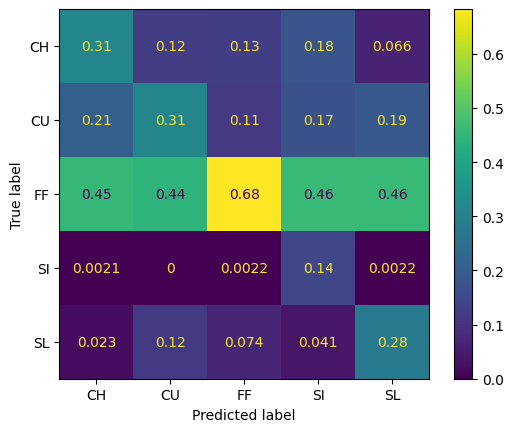

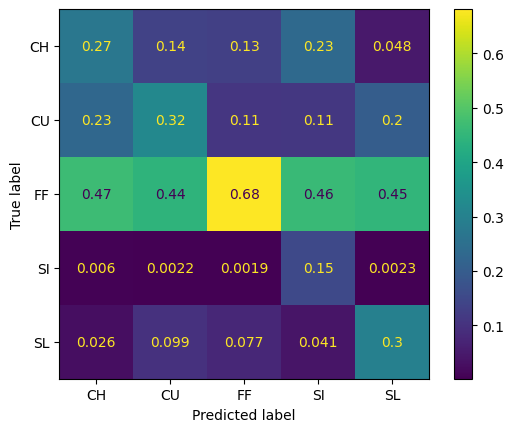

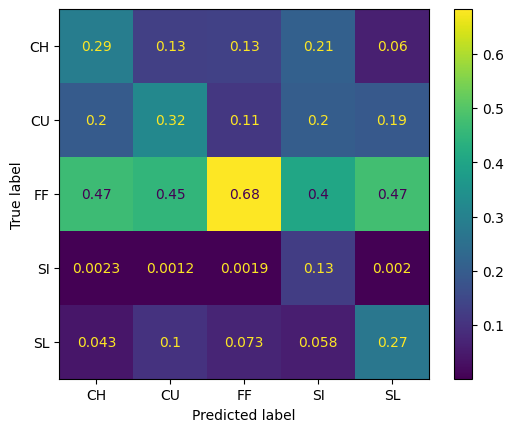

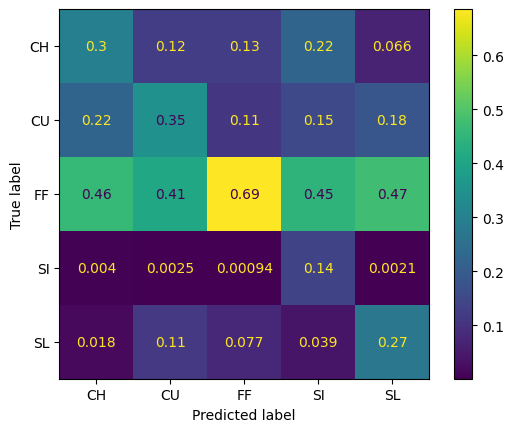

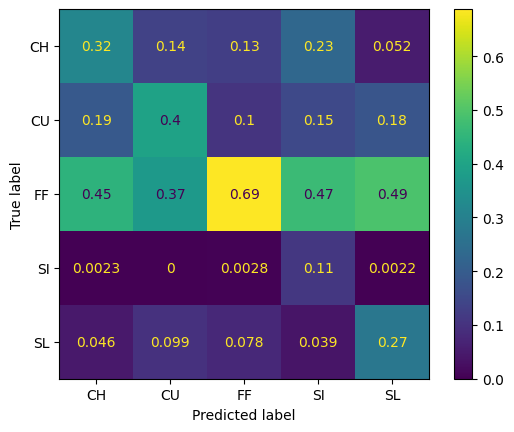

In [14]:
# Linear SVC - Whole Features: PCA 95% (53 features)
for fold, (train_index, test_index) in enumerate(skf.split(X_whole, y)):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    model = svm_whole_pca_models[fold]

    # "pred" - Probability: Given Predicted X, what is probability it is actually Y?
    # "true" - Probability: Given Actually Y, what is probability we guessed X?
    cm = confusion_matrix(y_test, model.predict(reduced_X_test), labels=model.classes_, normalize='pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()
    plt.show()

## Ensemble

In [20]:
from sklearn.ensemble import VotingClassifier

In [30]:
# Ensemble of LogReg Models
ensemble_models = []
ensemble_train_accs = []
ensemble_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X_whole, y)):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    svm_pca_model = svm_whole_pca_models[fold]
    svm_stdz_model = svm_whole_reg_models[fold]
    svm_model = svm_whole_models[fold]

    pca_mod_probs_train = svm_pca_model.predict(reduced_X_train)
    stdz_mod_probs_train = svm_stdz_model.predict(scaled_X_train)
    mod_probs_train = svm_model.predict(X_train)
    
    pca_mod_probs_test = svm_pca_model.predict(reduced_X_test)
    stdz_mod_probs_test = svm_stdz_model.predict(scaled_X_test)
    mod_probs_test = svm_model.predict(X_test)
    
#     print("Agreement PCA-STDZ: ", np.mean(pca_mod_probs_test == stdz_mod_probs_test))
#     print("Agreement PCA-REGULAR: ", np.mean(pca_mod_probs_test == mod_probs_test))
#     print("Agreement STDZ-REGULAR: ", np.mean(stdz_mod_probs_test == mod_probs_test))
    
    model_prob_votes_train = np.hstack([pca_mod_probs_train.reshape(-1, 1), stdz_mod_probs_train.reshape(-1, 1), mod_probs_train.reshape(-1, 1)])
    model_prob_votes_test = np.hstack([pca_mod_probs_test.reshape(-1, 1), stdz_mod_probs_test.reshape(-1, 1), mod_probs_test.reshape(-1, 1)])
    
    train_pred = []
    for votes in model_prob_votes_train:
        values, counts = np.unique(votes, return_counts=True)
        train_pred.append(values[np.argmax(counts)])
    train_pred = np.array(train_pred)
    
    test_pred = []
    for votes in model_prob_votes_test:
        values, counts = np.unique(votes, return_counts=True)
        test_pred.append(values[np.argmax(counts)])
    test_pred = np.array(test_pred)
    
    train_acc = np.mean(train_pred == y_train)
    test_acc = np.mean(test_pred == y_test)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc, "\n")
    
    print("Predictions:")
    print(np.unique(test_pred))
    print(np.unique(test_pred, return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")

Train Accuracy:  0.533537805040672
Test Accuracy:  0.5178666666666667 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 472  905 3231   96  921] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 

Train Accuracy:  0.5273147530781882
Test Accuracy:  0.5184 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 529  867 3152   69 1008] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 

Train Accuracy:  0.5337363321184105
Test Accuracy:  0.5211593172119487 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 523  883 3188   91  939] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5285358698550983
Test Accuracy:  0.52649359886202 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 540  773 3210   97 1004] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5339141257000622
Test Accuracy:  0.5430298719772404 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 484  852 3348   92  848] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 327

In [32]:
print(np.mean(svm_whole_train_accs), "\t", np.mean(svm_whole_test_accs))

print(np.mean(svm_wo_recurse_train_accs), "\t", np.mean(svm_wo_recurse_test_accs))

print(np.mean(svm_game_sit_train_accs), "\t", np.mean(svm_game_sit_test_accs))

print("\t", np.mean(svm_whole_reg_test_accs))

print("\t", np.mean(svm_wo_recurse_reg_test_accs))

print("\t", np.mean(svm_game_sit_reg_test_accs))

print(np.mean(svm_whole_pca_train_accs), "\t", np.mean(svm_whole_pca_test_accs))

print("\t", np.mean(svm_wo_recurse_pca_test_accs))

print("\t", np.mean(svm_game_sit_pca_test_accs))

0.5270425879089071 	 0.5233995764185237
0.5171040484006337 	 0.511983461356093
0.5401999072560333 	 0.5397196586059745
	 0.5233626932195353
	 0.49516434961277067
	 0.4851009009009009
0.5168285082591766 	 0.5132637584953375
	 0.494274512407144
	 0.48289615299510036
